Imports


In [1]:
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv('./dataset/train.csv')
print(df_train.shape)
df_train.head()

(165034, 14)


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [3]:
df_test = pd.read_csv('./dataset/test.csv')
print(df_test.shape)
df_test.head()

(110023, 13)


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


EDA


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def diagnostic_plots(df, variable, Exited):
    plt.figure(figsize=(18, 4))

    plt.subplot(1, 4, 1)
    skew = df[variable].skew()
    sns.histplot(df[variable], kde=True, bins=30, color='r', stat='density', label='Skew = %.3f' %(skew))
    plt.legend(loc='best')
    plt.title('Histogram')

    plt.subplot(1, 4, 2)
    plt.scatter(df[variable], df[Exited], color='b')
    plt.title('Scatter plot')

    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable], color='g', x=df[Exited])
    plt.title('Boxplot')

    plt.subplot(1, 4, 4)
    sns.barplot(x=df[Exited], y=df[variable], color='c')
    plt.title('Bar plot')

    plt.show()

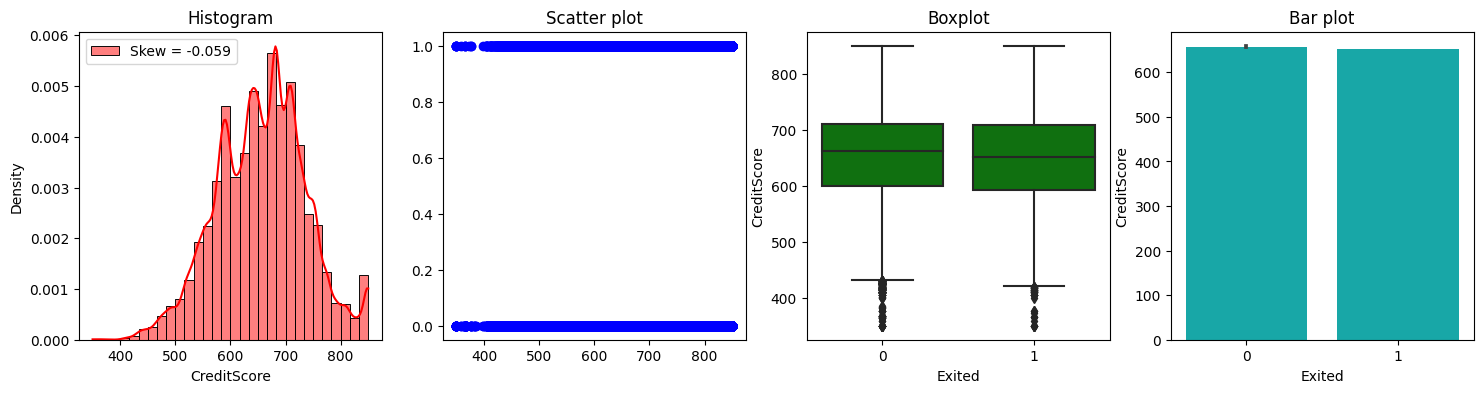

In [7]:
# Exited Vs CreditScore
diagnostic_plots(df_train, 'CreditScore', 'Exited')

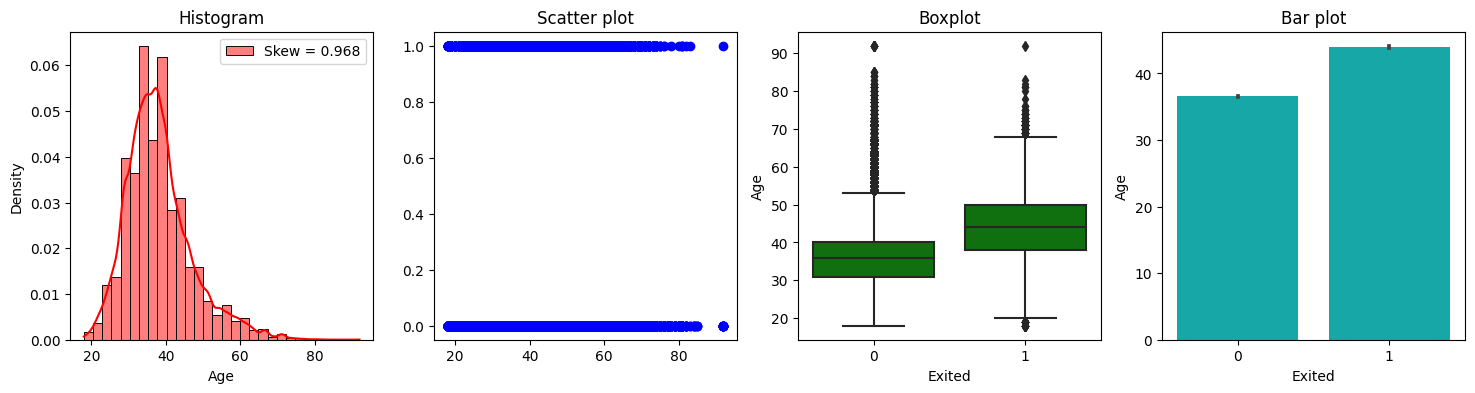

In [8]:
# Exited Vs Age
diagnostic_plots(df_train, 'Age', 'Exited')

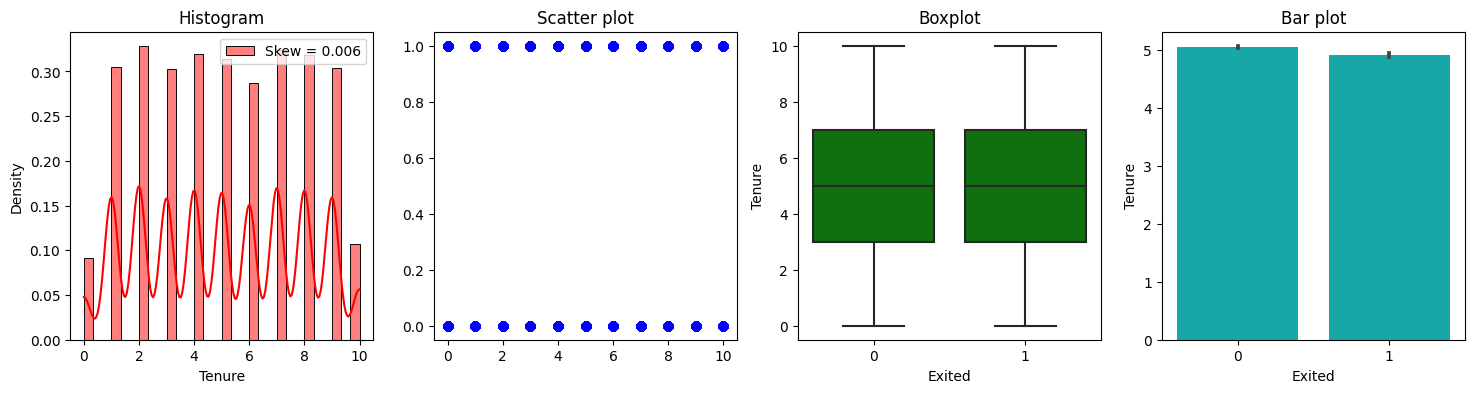

In [9]:
# Exited Vs Tenure
diagnostic_plots(df_train, 'Tenure', 'Exited')

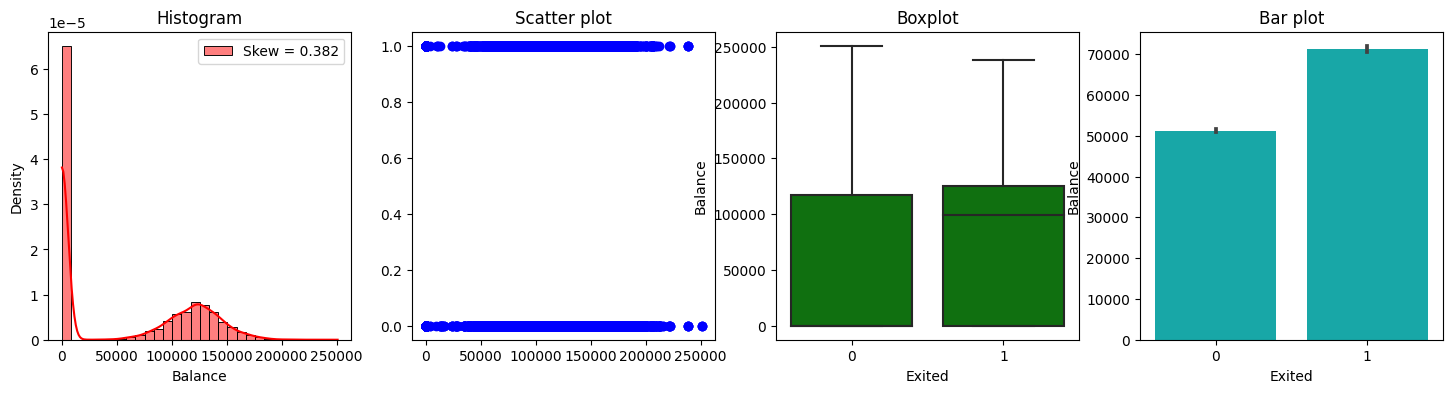

In [10]:
# Exited Vs Balance
diagnostic_plots(df_train, 'Balance', 'Exited')

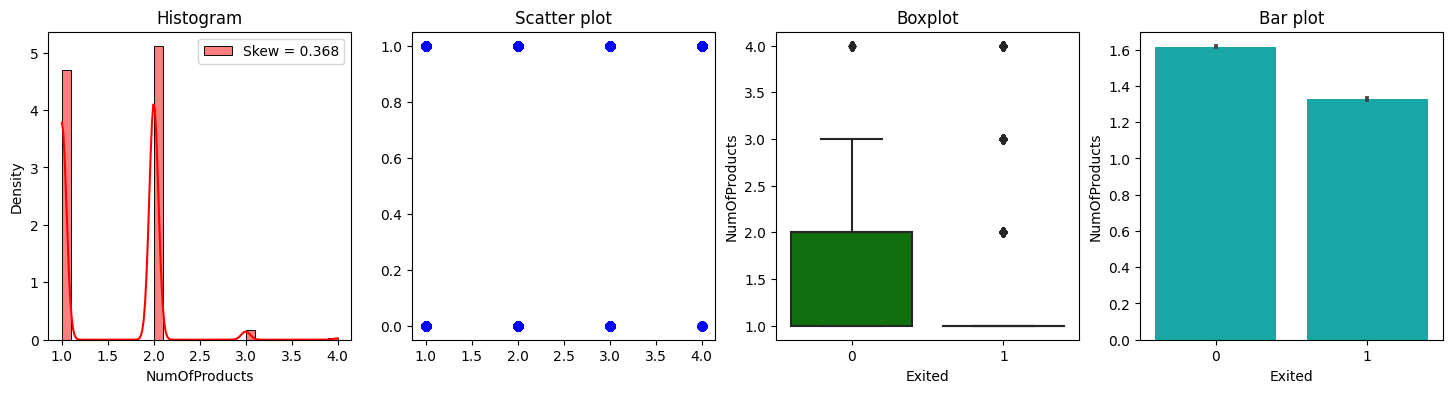

In [11]:
# Exited Vs NumOfProducts
diagnostic_plots(df_train, 'NumOfProducts', 'Exited')

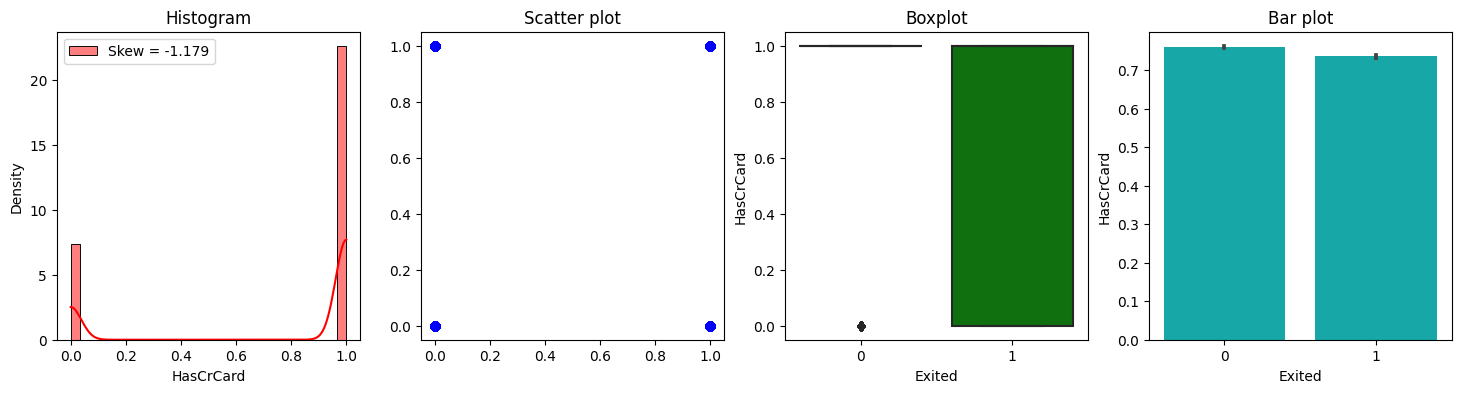

In [12]:
# Exited Vs HasCrCard
diagnostic_plots(df_train, 'HasCrCard', 'Exited')

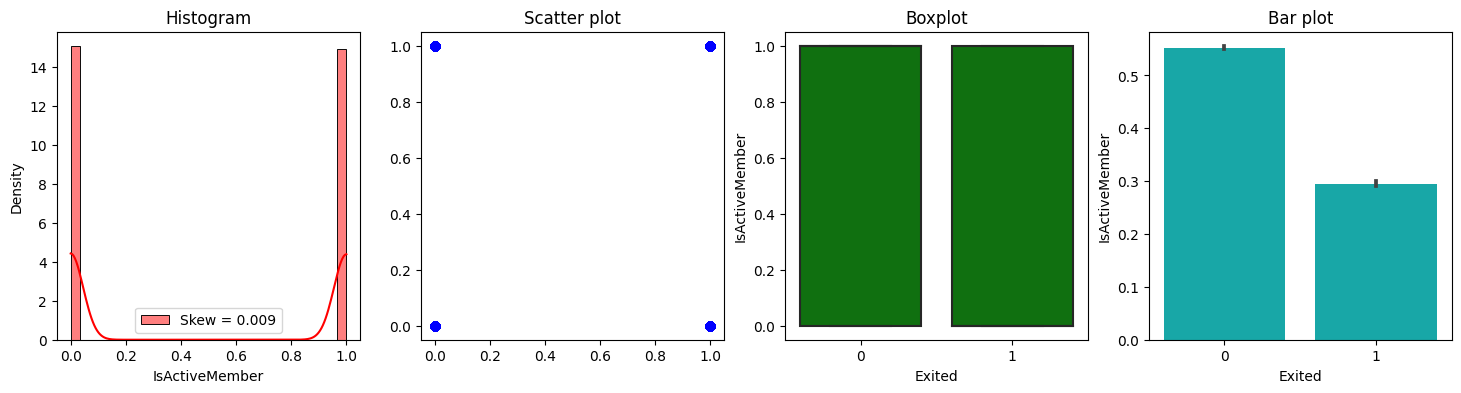

In [13]:
# Exited Vs IsActiveMember
diagnostic_plots(df_train, 'IsActiveMember', 'Exited')

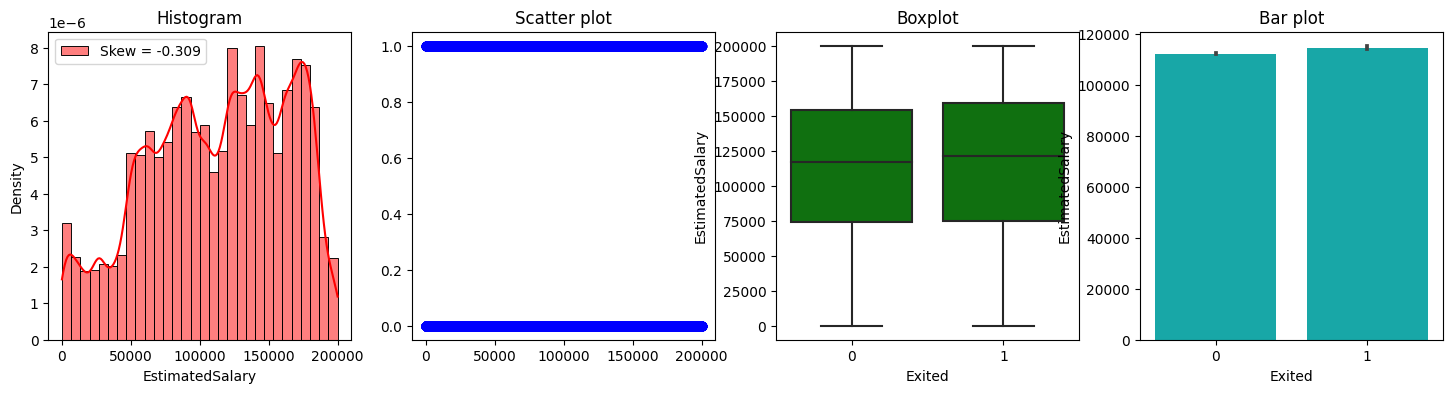

In [14]:
# Exited Vs EstimatedSalary
diagnostic_plots(df_train, 'EstimatedSalary', 'Exited')

feature, target and test data


In [15]:
feature = df_train.drop(["id", "CustomerId", "Surname", "Exited"], axis=1)
target = df_train['Exited']
test = df_test.drop(["id","CustomerId", "Surname"], axis=1)

In [16]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 12.6+ MB


In [17]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 165034 entries, 0 to 165033
Series name: Exited
Non-Null Count   Dtype
--------------   -----
165034 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      110023 non-null  int64  
 1   Geography        110023 non-null  object 
 2   Gender           110023 non-null  object 
 3   Age              110023 non-null  float64
 4   Tenure           110023 non-null  int64  
 5   Balance          110023 non-null  float64
 6   NumOfProducts    110023 non-null  int64  
 7   HasCrCard        110023 non-null  float64
 8   IsActiveMember   110023 non-null  float64
 9   EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 8.4+ MB


In [19]:
train_cor = pd.concat([test, df_train[['Exited']]], axis=1) 
train_cor

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,586.0,France,Female,23.0,2.0,0.00,2.0,0.0,1.0,160976.75,0
1,683.0,France,Female,46.0,2.0,0.00,1.0,1.0,0.0,72549.27,0
2,656.0,France,Female,34.0,7.0,0.00,2.0,1.0,0.0,138882.09,0
3,681.0,France,Male,36.0,8.0,0.00,1.0,1.0,0.0,113931.57,0
4,752.0,Germany,Male,38.0,10.0,121263.62,1.0,1.0,0.0,139431.00,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
165030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
165031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
165032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [20]:
train_cor_num = train_cor.select_dtypes(include=['int', 'float']).columns
train_cor[train_cor_num].head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,586.0,23.0,2.0,0.00,2.0,0.0,1.0,160976.75,0
1,683.0,46.0,2.0,0.00,1.0,1.0,0.0,72549.27,0
2,656.0,34.0,7.0,0.00,2.0,1.0,0.0,138882.09,0
3,681.0,36.0,8.0,0.00,1.0,1.0,0.0,113931.57,0
4,752.0,38.0,10.0,121263.62,1.0,1.0,0.0,139431.00,0


In [21]:
corr_matrix = train_cor[train_cor_num].corr()
corr_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.011123,0.009643,0.006956,0.012234,0.000915,0.014243,0.004896,-0.000117
Age,-0.011123,1.000000,-0.012733,0.066805,-0.106720,-0.015946,0.004463,-0.000335,0.000370
Tenure,0.009643,-0.012733,1.000000,-0.016486,0.015245,-0.002249,-0.005077,0.004098,0.001207
Balance,0.006956,0.066805,-0.016486,1.000000,-0.366908,-0.022470,-0.012252,0.009842,-0.000202
NumOfProducts,0.012234,-0.106720,0.015245,-0.366908,1.000000,0.004228,0.039955,-0.006374,-0.002948
HasCrCard,0.000915,-0.015946,-0.002249,-0.022470,0.004228,1.000000,-0.027275,0.003712,-0.002677
IsActiveMember,0.014243,0.004463,-0.005077,-0.012252,0.039955,-0.027275,1.000000,-0.009863,0.000493
EstimatedSalary,0.004896,-0.000335,0.004098,0.009842,-0.006374,0.003712,-0.009863,1.000000,0.001893
Exited,-0.000117,0.000370,0.001207,-0.000202,-0.002948,-0.002677,0.000493,0.001893,1.000000


In [22]:
def correlation_heatmap(corr_matrix, k):
  plt.figure(figsize=(5, 5))
  cols = corr_matrix.nlargest(k, 'Exited')['Exited'].index
  cm = np.corrcoef(corr_matrix[cols].values.T)
  sns.set(font_scale=0.9)
  hm = sns.heatmap(cm, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values, cmap="Purples")

  hm.xaxis.tick_top()
  plt.xticks(rotation=45, ha='left')

  plt.show()

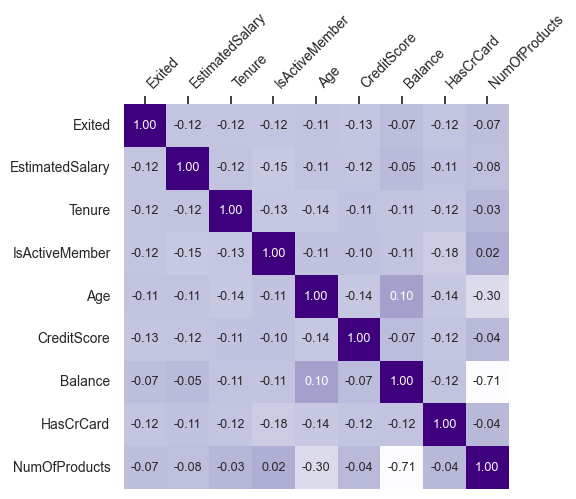

In [23]:
correlation_heatmap(corr_matrix, 9)

Standardization


In [24]:
# numerical features in train data
feature_num = feature.select_dtypes(include=['int', 'float']).columns
print(feature[feature_num].shape)
feature[feature_num].head()

(165034, 8)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,33.0,5,0.00,2,1.0,1.0,15068.83


In [25]:
# numerical features in test data
test_num = test.select_dtypes(include=['int', 'float']).columns
print(test[test_num].shape)
test[test_num].head()

(110023, 8)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,38.0,10,121263.62,1,1.0,0.0,139431.00


In [26]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(feature[feature_num])

feature_num_st = scaler.transform(feature[feature_num])
feature_num_st = pd.DataFrame(feature_num_st, columns=feature_num)

test_num_st = scaler.transform(test[test_num])
test_num_st = pd.DataFrame(test_num_st, columns=test_num)

print(feature_num_st.shape, test_num_st.shape)
feature_num_st.head()

(165034, 8) (110023, 8)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.144135,-0.578074,-0.719973,-0.883163,0.814298,0.571263,-0.99555,1.369486
1,-0.367706,-0.578074,-1.432694,-0.883163,0.814298,0.571263,1.00447,-1.254085
2,0.268974,0.211354,1.774548,-0.883163,0.814298,0.571263,-0.99555,1.437422
3,-0.941966,-0.465299,-1.076334,1.486918,-1.013348,0.571263,1.00447,-0.557018
4,0.743362,-0.578074,-0.007253,-0.883163,0.814298,0.571263,1.00447,-1.938770


One-hot encoding


In [27]:
# categoric variables in train data
feature_cat = feature.select_dtypes(include=['object']).columns
feature_cat = feature[feature_cat]
feature_cat.head()

,Geography,Gender
0,France,Male
1,France,Male
2,France,Male
3,France,Male
4,Spain,Male


In [28]:
# categoric variables in test data
test_cat = feature.select_dtypes(include=['object']).columns
test_cat = test[test_cat]
test_cat.head()

,Geography,Gender
0,France,Female
1,France,Female
2,France,Female
3,France,Male
4,Germany,Male


In [29]:
# one_hot_encoding for feature_cat
feature_cat_ohe = pd.get_dummies(feature_cat, columns=feature_cat.columns, dtype=int, drop_first=True)
feature_cat_ohe.head()

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,1


In [30]:
# one_hot_encoding for test_cat
test_cat_ohe = pd.get_dummies(test_cat, columns=test_cat.columns, dtype=int, drop_first=True)
test_cat_ohe.head()

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,1
4,1,0,1


Transformed data

In [31]:
# All transformed data

feature_tf = pd.concat([feature_num_st, feature_cat_ohe], axis=1)
test_tf = pd.concat([test_num_st, test_cat_ohe], axis=1)

print(feature_tf.shape, test_tf.shape)
feature_tf.head()

(165034, 11) (110023, 11)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0.144135,-0.578074,-0.719973,-0.883163,0.814298,0.571263,-0.99555,1.369486,0,0,1
1,-0.367706,-0.578074,-1.432694,-0.883163,0.814298,0.571263,1.00447,-1.254085,0,0,1
2,0.268974,0.211354,1.774548,-0.883163,0.814298,0.571263,-0.99555,1.437422,0,0,1
3,-0.941966,-0.465299,-1.076334,1.486918,-1.013348,0.571263,1.00447,-0.557018,0,0,1
4,0.743362,-0.578074,-0.007253,-0.883163,0.814298,0.571263,1.00447,-1.938770,0,1,1


In [32]:
target.value_counts()

0    130113
1     34921
Name: Exited, dtype: int64

In [33]:
train_all = pd.concat([feature_tf, target], axis=1) 
train_all

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
0,0.144135,-0.578074,-0.719973,-0.883163,0.814298,0.571263,-0.99555,1.369486,0,0,1,0
1,-0.367706,-0.578074,-1.432694,-0.883163,0.814298,0.571263,1.00447,-1.254085,0,0,1,0
2,0.268974,0.211354,1.774548,-0.883163,0.814298,0.571263,-0.99555,1.437422,0,0,1,0
3,-0.941966,-0.465299,-1.076334,1.486918,-1.013348,0.571263,1.00447,-0.557018,0,0,1,0
4,0.743362,-0.578074,-0.007253,-0.883163,0.814298,0.571263,1.00447,-1.938770,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.131651,-0.578074,-1.076334,-0.883163,-1.013348,0.571263,1.00447,0.382957,0,1,0,0
165030,1.692140,-0.352523,-0.719973,-0.883163,-1.013348,-1.750507,-0.99555,0.382951,0,0,1,0
165031,-1.141708,-0.803625,-0.007253,-0.883163,-1.013348,0.571263,1.00447,0.295366,0,0,1,0
165032,-1.279031,-0.916401,0.705467,1.688303,-1.013348,-1.750507,1.00447,-0.823217,0,1,0,0


In [34]:
corr_matrix = train_all.corr()
corr_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
CreditScore,1.000000,-0.008918,0.000942,0.006973,0.011361,-0.002828,0.014790,-0.001820,0.002996,0.003833,0.002310,-0.027383
Age,-0.008918,1.000000,-0.010830,0.064318,-0.102195,-0.012111,0.003320,-0.005399,0.093138,-0.012157,-0.063139,0.340768
Tenure,0.000942,-0.010830,1.000000,-0.009481,0.007335,0.005327,-0.005532,0.000971,-0.007751,0.004085,0.008767,-0.019565
Balance,0.006973,0.064318,-0.009481,1.000000,-0.361033,-0.018584,-0.015073,0.008586,0.539208,-0.132364,-0.014699,0.129743
NumOfProducts,0.011361,-0.102195,0.007335,-0.361033,1.000000,0.005482,0.039736,-0.004285,-0.103034,0.025889,0.026098,-0.214554
HasCrCard,-0.002828,-0.012111,0.005327,-0.018584,0.005482,1.000000,-0.021034,0.004438,-0.004988,-0.014037,0.006418,-0.022141
IsActiveMember,0.014790,0.003320,-0.005532,-0.015073,0.039736,-0.021034,1.000000,-0.008080,-0.036433,0.014473,0.033722,-0.210237
EstimatedSalary,-0.001820,-0.005399,0.000971,0.008586,-0.004285,0.004438,-0.008080,1.000000,0.013298,-0.010587,-0.007778,0.018827
Geography_Germany,0.002996,0.093138,-0.007751,0.539208,-0.103034,-0.004988,-0.036433,0.013298,1.000000,-0.273105,-0.039465,0.211054
Geography_Spain,0.003833,-0.012157,0.004085,-0.132364,0.025889,-0.014037,0.014473,-0.010587,-0.273105,1.000000,0.007480,-0.051175


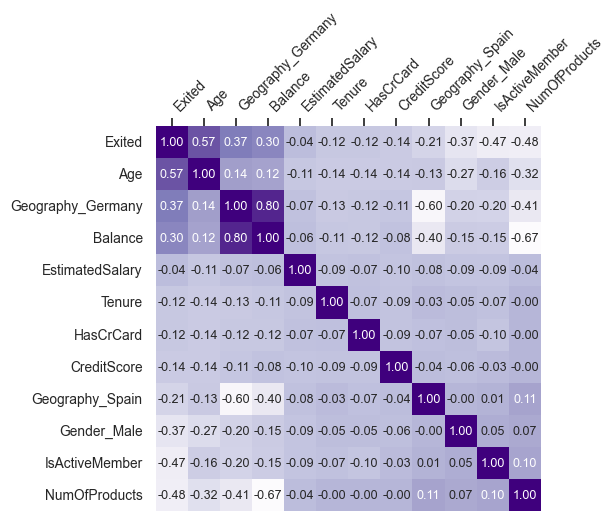

In [35]:
correlation_heatmap(corr_matrix, 12)

#### Models

Data split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_tf, target, test_size = 0.25, random_state = 0)

Model 1: Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state = 0)
model1.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[31114  1428]
 [ 5453  3264]]


0.8332242662207033

Model 2: Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [40]:
y_pred = model2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[28398  4144]
 [ 4140  4577]]


0.7992195642162923

Model 3: KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model3.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
y_pred = model3.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[30293  2249]
 [ 4015  4702]]


0.8481785792190795

Model 4: SVM

In [49]:
from sklearn.svm import SVC
model4 = SVC(kernel = 'linear', random_state = 0, cache_size=7000)
model4.fit(X_train, y_train)
model4()

In [ ]:
y_pred = model4.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

Model 5: Kernal SVM

In [ ]:
model5 = SVC(kernel = 'rbf', random_state = 0)
model5.fit(X_train, y_train)

In [ ]:
y_pred = model5.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

Model 6: Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
model6 = GaussianNB()
model6.fit(X_train, y_train)

GaussianNB()

In [44]:
y_pred = model6.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[29521  3021]
 [ 4750  3967]]


0.811653215056109

Model 7: XGBoost

In [45]:
from xgboost import XGBClassifier
model7 = XGBClassifier()
model7.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [46]:
y_pred = model7.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[30799  1743]
 [ 3876  4841]]


0.8638115320293754

Model 8: Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
model8 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model8.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [48]:
y_pred = model8.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[30826  1716]
 [ 4386  4331]]


0.8521049952737585

Model 9: Ensemble

In [ ]:
y_pred = model9.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)